In [35]:
%%html
<style type="text/css">
input.good:checked + label {color: green}
input.bad:checked + label {color: red}
input.good:checked + label::after {color: green; content: ' Õige vastus!'}
input.bad:checked + label::after {color: red; content: ' Vale vastus!'}
</style>

# Lineaarne kahemõõtmeline süsteem ja tema püsipunktid

## Üldine skeem

Kui on antud lineaarne kahemõõtmeline dünaamiline süsteem, siis on kindlaks püsipunktiks $\underline{x}_* = (0, 0)$. See tööleht näitab, kuidas saab määrata selle püsipunkti stabiilsust. Alljärgnev juhend võib kasuks olla.

*   Kirjutage oma süsteemi kujul $\underline{\dot{x}} = \underline{\underline{M}} \cdot \underline{x}$ maatriksiga $\underline{\underline{M}}$, ehk kujul

    $$\begin{pmatrix}\dot{x}_1 \\ \dot{x}_2\end{pmatrix} = \begin{pmatrix}a & b \\ c & d\end{pmatrix} \cdot \begin{pmatrix}x_1 \\ x_2\end{pmatrix}$$

*   Leidke karakteristlikku võrrandit

    $$0 = |\underline{\underline{M}} - \lambda\underline{\underline{1}}| = \begin{vmatrix}a - \lambda & b \\ c & d - \lambda\end{vmatrix} = (a - \lambda)(d - \lambda) - bc = \lambda^2 - \tau\lambda + \Delta,$$

    kus $\tau = a + d$ on **jälg** ja $\Delta = ad - bc$ on **determinant**.

*   Arvutage omaväärtusi

    $$\lambda_{1,2} = \frac{\tau}{2} \pm \sqrt{\frac{\tau^2}{4} - \Delta}.$$

    Siin $\delta = \frac{\tau^2}{4} - \Delta$ on **diskriminant**.

Püsipunkti $\underline{x}_* = (0, 0)$ tüüp sõltub maatriksi determinandist $\Delta$ ja jäljest $\tau$. Seda iseloomustada aitab selline skeem:

![Püsipunkti tüübi iseloomustamine](dim2_fp.jpg)

NumPy ja PyPlot aitavad meid püsipunkte visualiseerimiseks.

In [36]:
%matplotlib inline

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

Alljärgnev funktsioon&hellip;

* &hellip;arvutab $\tau$, $\Delta$, $\delta$;
* &hellip;arvutab omaväärtusi;
* &hellip;joonistab faasiportreet.

In [37]:
def fixed(a, b, c, d):
    tr = a + d
    det = a * d - b * c
    dis = tr ** 2 / 4.0 - det

    display(Markdown('Maatriks: $\\begin{pmatrix}%f & %f \\\\ %f & %f\\end{pmatrix}$' % (a, b, c, d)))
    display(Markdown('Jälg: &tau; = %f' % tr))
    display(Markdown('Determinant: &Delta; = %f' % det))
    display(Markdown('Diskriminant: &delta; = %f' % dis))
    if dis > 0:
        l1 = tr / 2 + np.sqrt(dis)
        l2 = tr / 2 - np.sqrt(dis)
        display(Markdown('Omaväärtused: &lambda;<sub>1</sub> = %f, &lambda;<sub>2</sub> = %f' % (l1, l2)))
    elif dis < 0:
        re = tr / 2
        im = np.sqrt(-dis)
        display(Markdown('Omaväärtused: &lambda;<sub>1</sub> = %f + %fi, &lambda;<sub>2</sub> = %f + %fi' % (re, im, re, -im)))
    else:
        display(Markdown('Omaväärtused: &lambda;<sub>1,2</sub> = %f' % (tr / 2)))

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_aspect('equal', 'box')
    ax.set_xlabel('x')
    ax.set_ylabel('y')

    X = np.linspace(-9, 9, 101)
    Y = np.linspace(-9, 9, 101)
    XX, YY = np.meshgrid(X, Y)
    DX = a * XX + b * YY
    DY = c * XX + d * YY
    ax.streamplot(XX, YY, DX, DY, color='b')

    if a**2 + b**2 + c**2 + d**2 > 0:
        X = np.linspace(-9, 9, 21)
        Y = np.linspace(-9, 9, 21)
        XX, YY = np.meshgrid(X, Y)
        DX = a * XX + b * YY
        DY = c * XX + d * YY
        ax.quiver(XX, YY, DX, DY, color='r')

    plt.show()

## Püsipunktide tüübid

### &delta; > 0, &Delta; > 0, &tau; > 0: ebastabiilne sõlm

Maatriksi omaväärtused on $\lambda_{1,2} = \frac{\tau}{2} \pm \sqrt{\delta}$. Mõlemad on positiivsed. Faasiportree on **ebastabiilne sõlm**. Püsipunkt $\underline{x}_* = (0, 0)$ on **repeller**.

Maatriks: $\begin{pmatrix}3.000000 & 1.000000 \\ 1.000000 & 3.000000\end{pmatrix}$

Jälg: &tau; = 6.000000

Determinant: &Delta; = 8.000000

Diskriminant: &delta; = 1.000000

Omaväärtused: &lambda;<sub>1</sub> = 4.000000, &lambda;<sub>2</sub> = 2.000000

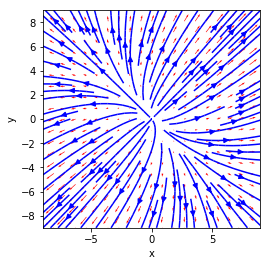

In [38]:
fixed(3, 1, 1, 3)

### &delta; > 0, &Delta; > 0, &tau; < 0: stabiilne sõlm

Maatriksi omaväärtused on $\lambda_{1,2} = \frac{\tau}{2} \pm \sqrt{\delta}$. Mõlemad on negatiivsed. Faasiportree on **stabiilne sõlm**. Püsipunkt $\underline{x}_* = (0, 0)$ on **atraktor**.

Maatriks: $\begin{pmatrix}-3.000000 & -1.000000 \\ -1.000000 & -3.000000\end{pmatrix}$

Jälg: &tau; = -6.000000

Determinant: &Delta; = 8.000000

Diskriminant: &delta; = 1.000000

Omaväärtused: &lambda;<sub>1</sub> = -2.000000, &lambda;<sub>2</sub> = -4.000000

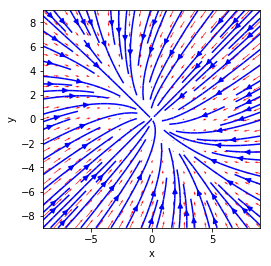

In [39]:
fixed(-3, -1, -1, -3)

### &delta; > 0, &Delta; < 0: sadul

Maatriksi omaväärtused on $\lambda_{1,2} = \frac{\tau}{2} \pm \sqrt{\delta}$. Üks on negatiivne, üks on positiivne. Püsipunkt $\underline{x}_* = (0, 0)$ on **sadul**.

Maatriks: $\begin{pmatrix}1.000000 & 3.000000 \\ 3.000000 & 1.000000\end{pmatrix}$

Jälg: &tau; = 2.000000

Determinant: &Delta; = -8.000000

Diskriminant: &delta; = 9.000000

Omaväärtused: &lambda;<sub>1</sub> = 4.000000, &lambda;<sub>2</sub> = -2.000000

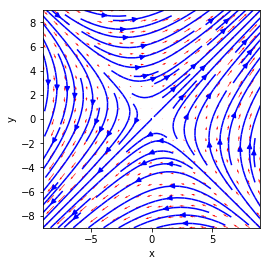

In [40]:
fixed(1, 3, 3, 1)

### &delta; > 0, &Delta; = 0, &tau; > 0: ebastabiilne sirge

Maatriksi omaväärtused on $\lambda_1 = 0$ ja $\lambda_2 = \tau$. Üks on null, üks on positiivne. Faasiportree on **ebastabiilne sirge**. Püsipunkt $\underline{x}_* = (0, 0)$ on **mitteisoleeritud**.

Maatriks: $\begin{pmatrix}1.000000 & -1.000000 \\ -1.000000 & 1.000000\end{pmatrix}$

Jälg: &tau; = 2.000000

Determinant: &Delta; = 0.000000

Diskriminant: &delta; = 1.000000

Omaväärtused: &lambda;<sub>1</sub> = 2.000000, &lambda;<sub>2</sub> = 0.000000

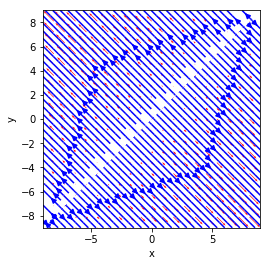

In [41]:
fixed(1, -1, -1, 1)

### &delta; > 0, &Delta; = 0, &tau; < 0: stabiilne sirge

Maatriksi omaväärtused on $\lambda_1 = 0$ ja $\lambda_2 = \tau$. Üks on null, üks on negatiivne. Faasiportree on **stabiilne sirge**. Püsipunkt $\underline{x}_* = (0, 0)$ on **mitteisoleeritud**.

Maatriks: $\begin{pmatrix}-1.000000 & 1.000000 \\ 1.000000 & -1.000000\end{pmatrix}$

Jälg: &tau; = -2.000000

Determinant: &Delta; = 0.000000

Diskriminant: &delta; = 1.000000

Omaväärtused: &lambda;<sub>1</sub> = 0.000000, &lambda;<sub>2</sub> = -2.000000

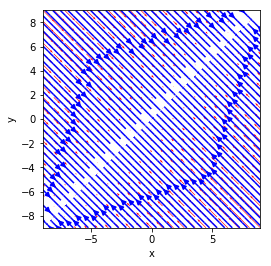

In [42]:
fixed(-1, 1, 1, -1)

### &delta; < 0, &tau; > 0: ebastabiilne fookus

Maatriksi omaväärtused on $\lambda_{1,2} = \frac{\tau}{2} \pm i\sqrt{-\delta}$. Nende reaalosad on positiivsed. Faasiportree on **ebastabiilne fookus**. Püsipunkt $\underline{x}_* = (0, 0)$ on **repeller**.

Maatriks: $\begin{pmatrix}1.000000 & 1.000000 \\ -3.000000 & 1.000000\end{pmatrix}$

Jälg: &tau; = 2.000000

Determinant: &Delta; = 4.000000

Diskriminant: &delta; = -3.000000

Omaväärtused: &lambda;<sub>1</sub> = 1.000000 + 1.732051i, &lambda;<sub>2</sub> = 1.000000 + -1.732051i

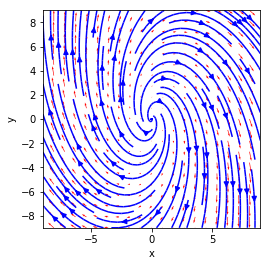

In [43]:
fixed(1, 1, -3, 1)

### &delta; < 0, &tau; < 0: stabiilne fookus

Maatriksi omaväärtused on $\lambda_{1,2} = \frac{\tau}{2} \pm i\sqrt{-\delta}$. Nende reaalosad on negatiivsed. Faasiportree on **stabiilne fookus**. Püsipunkt $\underline{x}_* = (0, 0)$ on **atraktor**.

Maatriks: $\begin{pmatrix}-1.000000 & 3.000000 \\ -1.000000 & -1.000000\end{pmatrix}$

Jälg: &tau; = -2.000000

Determinant: &Delta; = 4.000000

Diskriminant: &delta; = -3.000000

Omaväärtused: &lambda;<sub>1</sub> = -1.000000 + 1.732051i, &lambda;<sub>2</sub> = -1.000000 + -1.732051i

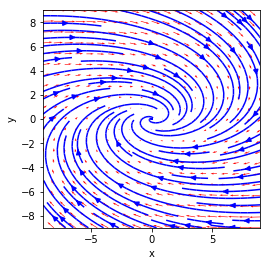

In [44]:
fixed(-1, 3, -1, -1)

### &delta; < 0, &tau; = 0: tsenter

Maatriksi omaväärtused on $\lambda_{1,2} = i\sqrt{\Delta}$. Nende reaalosad on null. Püsipunkt $\underline{x}_* = (0, 0)$ on **tsenter**.

Maatriks: $\begin{pmatrix}0.000000 & 1.000000 \\ -1.000000 & 0.000000\end{pmatrix}$

Jälg: &tau; = 0.000000

Determinant: &Delta; = 1.000000

Diskriminant: &delta; = -1.000000

Omaväärtused: &lambda;<sub>1</sub> = 0.000000 + 1.000000i, &lambda;<sub>2</sub> = 0.000000 + -1.000000i

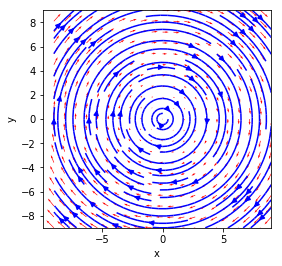

In [45]:
fixed(0, 1, -1, 0)

### &delta; = 0, maatriks on diagonaalne, &tau; > 0: ebastabiilne sõlm

Maatriksi omaväärtused $\lambda_{1,2} = \frac{\tau}{2}$ on identsed ja positiivsed. Faasiportree on **ebastabiilne sõlm**. Püsipunkt $\underline{x}_* = (0, 0)$ on **repeller**.

Maatriks: $\begin{pmatrix}1.000000 & 0.000000 \\ 0.000000 & 1.000000\end{pmatrix}$

Jälg: &tau; = 2.000000

Determinant: &Delta; = 1.000000

Diskriminant: &delta; = 0.000000

Omaväärtused: &lambda;<sub>1,2</sub> = 1.000000

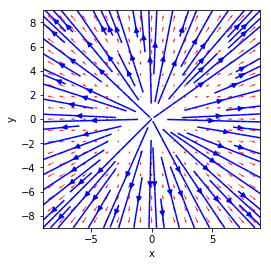

In [46]:
fixed(1, 0, 0, 1)

### &delta; = 0, maatriks on diagonaalne, &tau; < 0: stabiilne sõlm

Maatriksi omaväärtused $\lambda_{1,2} = \frac{\tau}{2}$ on identsed ja negatiivsed. Faasiportree on **stabiilne sõlm**. Püsipunkt $\underline{x}_* = (0, 0)$ on **atraktor**.

Maatriks: $\begin{pmatrix}-1.000000 & 0.000000 \\ 0.000000 & -1.000000\end{pmatrix}$

Jälg: &tau; = -2.000000

Determinant: &Delta; = 1.000000

Diskriminant: &delta; = 0.000000

Omaväärtused: &lambda;<sub>1,2</sub> = -1.000000

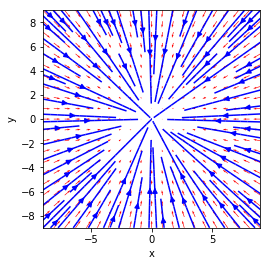

In [47]:
fixed(-1, 0, 0, -1)

### &delta; = 0, maatriks on diagonaalne, &tau; = 0: degenereeritud

Maatriksi omaväärtused $\lambda_{1,2} = 0$ on identselt null. Faasiportree on **degenereeritud**. Püsipunkt $\underline{x}_* = (0, 0)$ on **mitteisoleeritud**.

Maatriks: $\begin{pmatrix}0.000000 & 0.000000 \\ 0.000000 & 0.000000\end{pmatrix}$

Jälg: &tau; = 0.000000

Determinant: &Delta; = 0.000000

Diskriminant: &delta; = 0.000000

Omaväärtused: &lambda;<sub>1,2</sub> = 0.000000

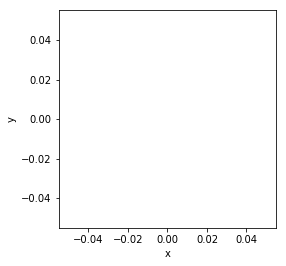

In [48]:
fixed(0, 0, 0, 0)

### &delta; = 0, maatriks ei ole diagonaalne, &tau; > 0: ebastabiilne tärn

Maatriksil on ainult üks positiivne omaväärtus $\lambda_1 = \frac{\tau}{2}$. Faasiportree on **ebastabiilne tärn**. Püsipunkt $\underline{x}_* = (0, 0)$ on **repeller**.

Maatriks: $\begin{pmatrix}3.000000 & 1.000000 \\ -1.000000 & 1.000000\end{pmatrix}$

Jälg: &tau; = 4.000000

Determinant: &Delta; = 4.000000

Diskriminant: &delta; = 0.000000

Omaväärtused: &lambda;<sub>1,2</sub> = 2.000000

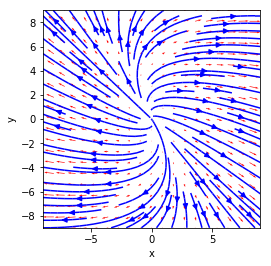

In [49]:
fixed(3, 1, -1, 1)

### &delta; = 0, maatriks ei ole diagonaalne, &tau; < 0: stabiilne tärn

Maatriksil on ainult üks negatiivne omaväärtus $\lambda_1 = \frac{\tau}{2}$. Faasiportree on **stabiilne tärn**. Püsipunkt $\underline{x}_* = (0, 0)$ on **atraktor**.

Maatriks: $\begin{pmatrix}-1.000000 & 1.000000 \\ -1.000000 & -3.000000\end{pmatrix}$

Jälg: &tau; = -4.000000

Determinant: &Delta; = 4.000000

Diskriminant: &delta; = 0.000000

Omaväärtused: &lambda;<sub>1,2</sub> = -2.000000

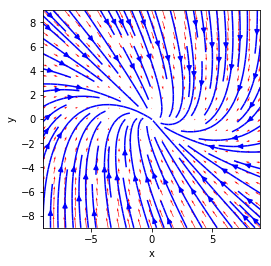

In [50]:
fixed(-1, 1, -1, -3)

### &delta; = 0, maatriks ei ole diagonaalne, &tau; = 0: degenereeritud tärn

Maatriksil on ainult üks omaväärtus $\lambda_1 = 0$. Faasiportree on **degenereeritud tärn**. Püsipunkt $\underline{x}_* = (0, 0)$ on **mitteisoleeritud**.

Maatriks: $\begin{pmatrix}1.000000 & 1.000000 \\ -1.000000 & -1.000000\end{pmatrix}$

Jälg: &tau; = 0.000000

Determinant: &Delta; = 0.000000

Diskriminant: &delta; = 0.000000

Omaväärtused: &lambda;<sub>1,2</sub> = 0.000000

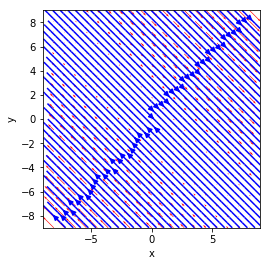

In [51]:
fixed(1, 1, -1, -1)

## Küsimused

### Nõrga hõõrdejõuga ühemõõtmeline lineaarne pendel

Ühemõõtmelist pendli kirjeldab liikumisvõrrand

$$\ddot{x} = -kx - h\dot{x}.$$

Eeldage, et $h >  0$ ja $k > \frac{h^2}{4}$. Kirjutage liikumisvõrrandi dünaamilise süsteemi kujul, kasutades definitsiooni $v = \dot{x}$. Milline on süsteemi püsipunkt $(x_*, v_*) = (0, 0)$?

* <input id="pp1A" name="pp1" class="bad" type="radio"><label for="pp1">ebastabiilne sõlm</label>
* <input id="pp1B" name="pp1" class="bad" type="radio"><label for="pp1">stabiilne sõlm</label>
* <input id="pp1C" name="pp1" class="bad" type="radio"><label for="pp1">ebastabiilne sirge</label>
* <input id="pp1D" name="pp1" class="bad" type="radio"><label for="pp1">stabiilne sirge</label>
* <input id="pp1E" name="pp1" class="bad" type="radio"><label for="pp1">ebastabiilne fookus</label>
* <input id="pp1F" name="pp1" class="good" type="radio"><label for="pp1">stabiilne fookus</label>
* <input id="pp1G" name="pp1" class="bad" type="radio"><label for="pp1">tsenter</label>
* <input id="pp1H" name="pp1" class="bad" type="radio"><label for="pp1">sadul</label>
* <input id="pp1I" name="pp1" class="bad" type="radio"><label for="pp1">degenereeritud</label>
* <input id="pp1J" name="pp1" class="bad" type="radio"><label for="pp1">ebastabiilne tärn</label>
* <input id="pp1K" name="pp1" class="bad" type="radio"><label for="pp1">stabiilne tärn</label>
* <input id="pp1L" name="pp1" class="bad" type="radio"><label for="pp1">degenereeritud tärn</label>

### Tugeva hõõrdejõuga ühemõõtmeline lineaarne pendel

Milliseks muutub eelnevalt kirjeldatud süsteemi püsipunkt $(x_*, v_*) = (0, 0)$, kui $0 < k < \frac{h^2}{4}$?

* <input id="pp2A" name="pp2" class="bad" type="radio"><label for="pp2">ebastabiilne sõlm</label>
* <input id="pp2B" name="pp2" class="good" type="radio"><label for="pp2">stabiilne sõlm</label>
* <input id="pp2C" name="pp2" class="bad" type="radio"><label for="pp2">ebastabiilne sirge</label>
* <input id="pp2D" name="pp2" class="bad" type="radio"><label for="pp2">stabiilne sirge</label>
* <input id="pp2E" name="pp2" class="bad" type="radio"><label for="pp2">ebastabiilne fookus</label>
* <input id="pp2F" name="pp2" class="bad" type="radio"><label for="pp2">stabiilne fookus</label>
* <input id="pp2G" name="pp2" class="bad" type="radio"><label for="pp2">tsenter</label>
* <input id="pp2H" name="pp2" class="bad" type="radio"><label for="pp2">sadul</label>
* <input id="pp2I" name="pp2" class="bad" type="radio"><label for="pp2">degenereeritud</label>
* <input id="pp2J" name="pp2" class="bad" type="radio"><label for="pp2">ebastabiilne tärn</label>
* <input id="pp2K" name="pp2" class="bad" type="radio"><label for="pp2">stabiilne tärn</label>
* <input id="pp2L" name="pp2" class="bad" type="radio"><label for="pp2">degenereeritud tärn</label>

### Ilma hõõrdejõuta ühemõõtmeline lineaarne pendel

Milliseks muutub eelnevalt kirjeldatud süsteemi püsipunkt $(x_*, v_*) = (0, 0)$, kui $h = 0$ ja $k > 0$?

* <input id="pp3A" name="pp3" class="bad" type="radio"><label for="pp3">ebastabiilne sõlm</label>
* <input id="pp3B" name="pp3" class="bad" type="radio"><label for="pp3">stabiilne sõlm</label>
* <input id="pp3C" name="pp3" class="bad" type="radio"><label for="pp3">ebastabiilne sirge</label>
* <input id="pp3D" name="pp3" class="bad" type="radio"><label for="pp3">stabiilne sirge</label>
* <input id="pp3E" name="pp3" class="bad" type="radio"><label for="pp3">ebastabiilne fookus</label>
* <input id="pp3F" name="pp3" class="bad" type="radio"><label for="pp3">stabiilne fookus</label>
* <input id="pp3G" name="pp3" class="good" type="radio"><label for="pp3">tsenter</label>
* <input id="pp3H" name="pp3" class="bad" type="radio"><label for="pp3">sadul</label>
* <input id="pp3I" name="pp3" class="bad" type="radio"><label for="pp3">degenereeritud</label>
* <input id="pp3J" name="pp3" class="bad" type="radio"><label for="pp3">ebastabiilne tärn</label>
* <input id="pp3K" name="pp3" class="bad" type="radio"><label for="pp3">stabiilne tärn</label>
* <input id="pp3L" name="pp3" class="bad" type="radio"><label for="pp3">degenereeritud tärn</label>